## Title: M2 Linear Programming Assignment
## Author: Leo Genders
## Date: 14 July 2024

## 1) Textbook Problem 3.2(a)
Screenshot of Excel model for Problem 3.2(a)

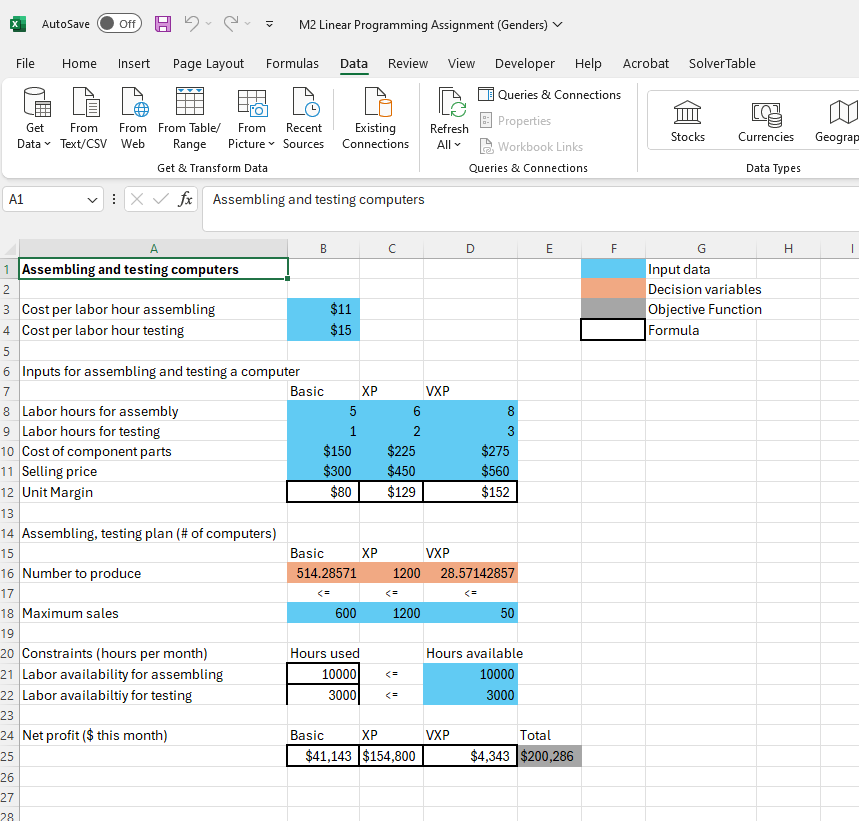

In [1]:
from IPython import display
display.Image("3_2a_model.png")

Screenshot of Excel Solver for Problem 3.2(a)

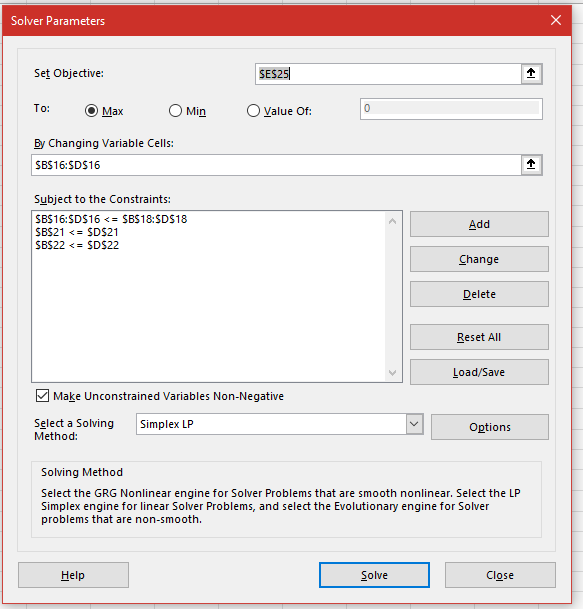

In [2]:
from IPython import display
display.Image("3_2a_solver.png")

Formulate the problem in Jupyter Notebook

## Model Formulation - Problem 3.2(a)

**Sets** \
$C$: set of computers \{1=Basic, 2=XP, 3=VXP\} \
$P$: set of processes \{1=assembly, 2=testing\}

**Parameters** \
$v$: vector of unit profits ($v_1 = 80$, $v_2 = 129$, $v_3 = 152$) \
$d$: vector of demands ($d_1 = 600$, $d_2 = 1200$, $d_3 = 50$) \
$r$: vector of available hourly resources ($r_1 = 10000$, $r_2 = 3000$) \
$A$: matrix of hourly resource requirements, where $a_{i,i}$ represents the hours of process $i$ to produce computer $j$. For example, $a_{1,2} = $6 because it takes $6$ hours of assembly ($i=1$) to produce XP computers ($j=2$).

**Decision Variable** \
$x$: vector amount of each type of computer to produce, where $x_1$ is Basic, $x_2$ is XP, and $x_3$ is VXP.

**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\underset{x}{\max} & 80x_1 + 129x_2 + 152x_3 &\\
\textrm{s.t.} & 5x_1 + 6x_2 + 8x_3 & \leq & 10000 & \\
& x_1 + 2x_2 + 3x_3 & \leq & 3000 & \\
& x_1 & \leq & 600 \\
& x_2 & \leq & 1200 \\
& x_3 & \leq & 50 \\
& x_1, x_2, x_3 & \geq & 0 \\
\end{matrix}
\end{equation*}



## Python/Gurobi Model - Problem 3.2(a)
I am using the lists with 'Brute Force' Approach from Insights Video 2.3

In [3]:
from gurobipy import *
m = Model('Problem3_2a')

# Sets
# Not defining sets - using 'brute force' method

# Parameters
# Not defining parameters - using 'brute force' method

# Decision Variables
## Number basic computers to produce
x1 = m.addVar(name='Basic', ub=600, lb=0)
## Number XP computers to produce
x2 = m.addVar(name='XP', ub=1200, lb=0)
## Number VXP computers to produce
x3 = m.addVar(name='VXP', ub=50, lb=0)

# Objective Function
## Maximize total profit
m.setObjective(80*x1 + 129*x2 + 152*x3, GRB.MAXIMIZE)
m.update()

# Constraints
## Assembly hours constraint
m.addConstr(5*x1 + 6*x2 + 8*x3 <= 10000)
## Testing hours constraint
m.addConstr(x1 + 2*x2 + 3*x3 <= 3000)
m.update()

# Solve and Print Solution
m.optimize()
print("\n\n")
print("PC Tech should produce %s units of Basic computers." % round(x1.x))
print("PC Tech should produce %s units of XP computers." % round(x2.x))
print("PC Tech should produce %s units of VXP computers." % round(x3.x))
print("The total profit is %s." % round(m.objval, 2))


Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-03
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x38136073
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [5e+01, 1e+03]
  RHS range        [3e+03, 1e+04]
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1500000e+05   2.750000e+02   0.000000e+00      0s
       2    2.0028571e+05   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.002857143e+05



PC Tech should produce 514 units of Basic computers.
PC Tech should pro

In [4]:
###############################################################################################################################

## 2) Textbook Problem 3.3
Perform the sensitivity analysis in Excel - I used SolverTable add-in. Changing the selling price of VXP computers from $500$ to $650$ in increments of $10$.\
Screenshot of Excel SolverTable for Sensitivity Analysis for Problem 3.3

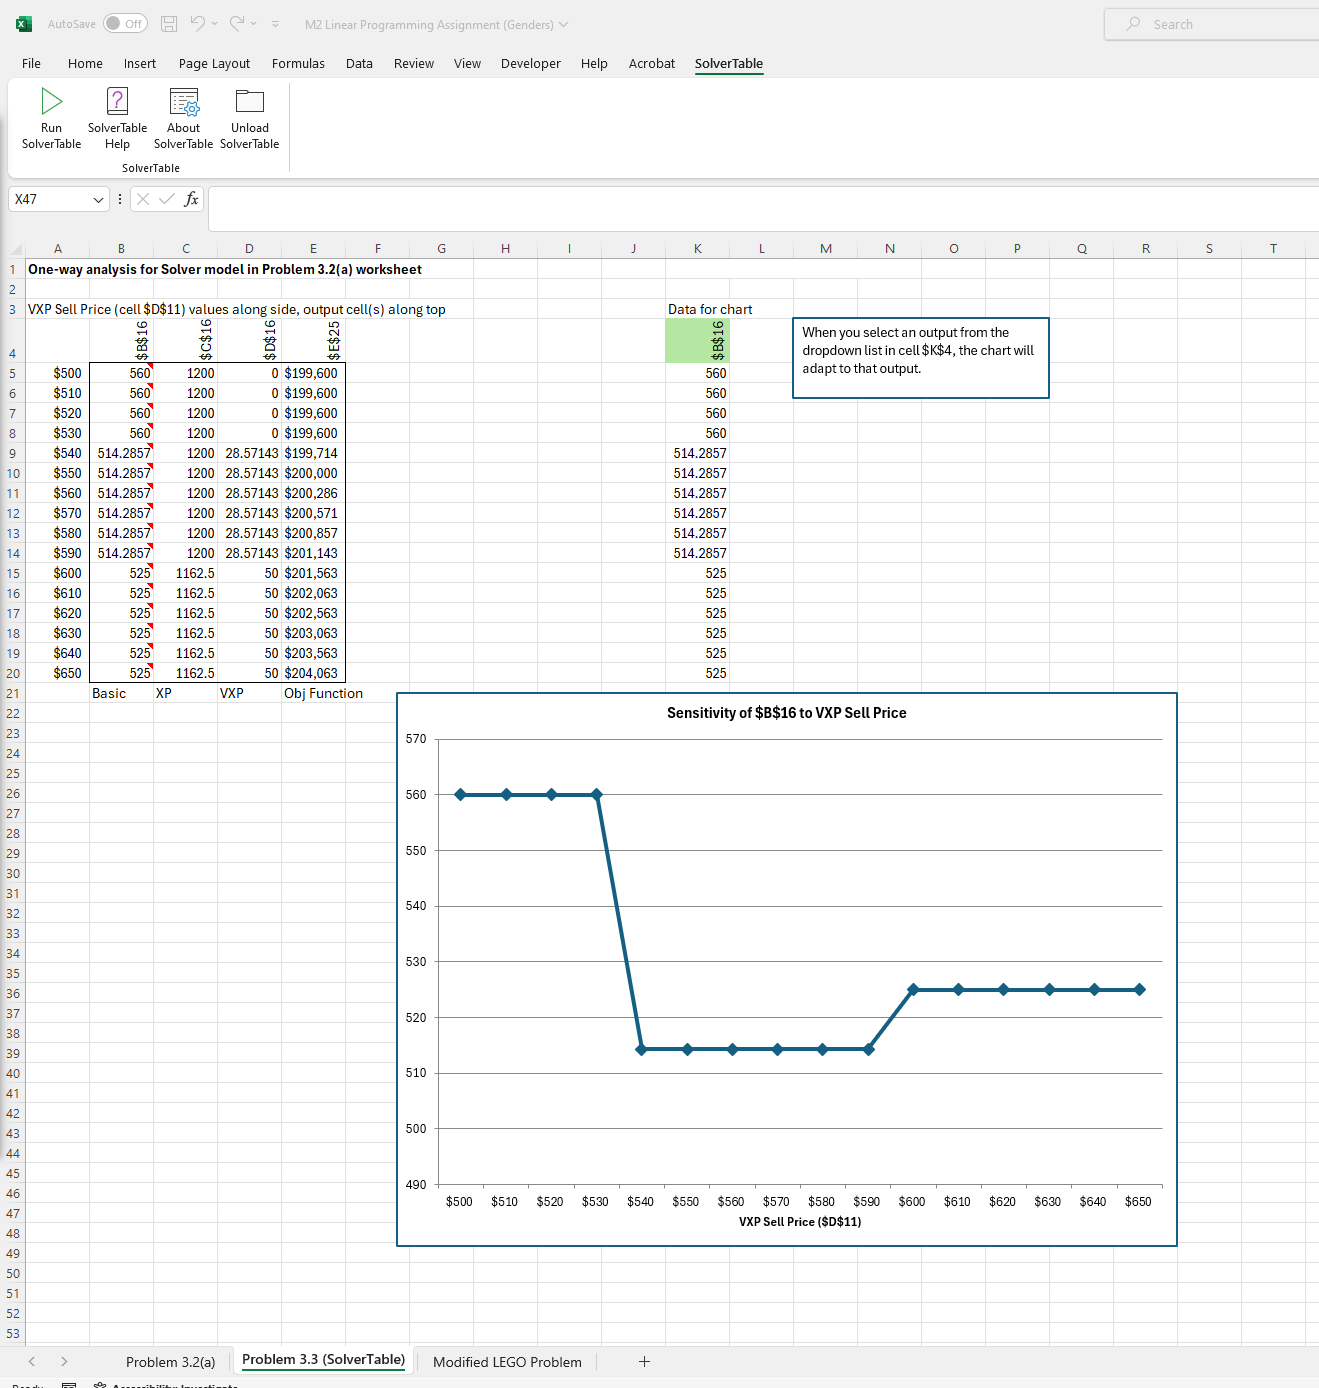

In [5]:
from IPython import display
display.Image("3_3_solvertable.png")

## Sensitivity Analysis - Problem 3.3
Perform sensitivity analysis in Python by iterating over the specified values and resolving your model each time.\
Changing the selling price of VXP computers from $500$ to $650$ in increments of $10$.


In [6]:
from gurobipy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
m = Model('Problem3_2a')

# Setup the model
# Decision Variables
## Number basic computers to produce
x1 = m.addVar(name='Basic', ub=600, lb=0)
## Number XP computers to produce
x2 = m.addVar(name='XP', ub=1200, lb=0)
## Number VXP computers to produce
x3 = m.addVar(name='VXP', ub=50, lb=0)

# Objective Function
## Maximize total profit
m.setObjective(80*x1 + 129*x2 + (560-275-(11*8)-(15*3))*x3, GRB.MAXIMIZE)
m.update()

# Constraints
## Note that upper and lower bound constraints on decision variables are addressed within variable declarations abvoe.
## Assembly hours constraint
m.addConstr(5*x1 + 6*x2 + 8*x3 <= 10000)
## Testing hours constraint
m.addConstr(x1 + 2*x2 + 3*x3 <= 3000)
m.update()

# define data structure to hold values of interest
df = pd.DataFrame(columns=['PriceVXP', 'NumBasic', 'NumXP', 'NumVXP', 'Profit'])
svxp = np.arange(500, 651, 10)

# loop over changing values
for i in range(len(svxp)):
    # update and solve
    m.setObjective(80*x1 + 129*x2 + (svxp[i]-275-(11*8)-(15*3))*x3, GRB.MAXIMIZE)
    m.update()
    m.optimize()
    
    df.loc[i] = [svxp[i], x1.x, x2.x, x3.x, m.objVal]

# view results
df

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x175f0d7f
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [8e+01, 1e+02]
  Bounds range     [5e+01, 1e+03]
  RHS range        [3e+03, 1e+04]
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1500000e+05   2.750000e+02   0.000000e+00      0s
       1    1.9960000e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.996000000e+05
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thr


Optimize a model with 2 rows, 3 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [5e+01, 1e+03]
  RHS range        [3e+03, 1e+04]
LP warm-start: use basis
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0206250e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.020625000e+05
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [5e+01, 1e+03]
  RHS range        [3e+03, 1e+04]
LP warm-start: use basis
Iteration    Objective       Primal Inf.    Dual Inf.   

,PriceVXP,NumBasic,NumXP,NumVXP,Profit
0,500.0,560.000000,1200.0,0.000000,199600.000000
1,510.0,560.000000,1200.0,0.000000,199600.000000
2,520.0,560.000000,1200.0,0.000000,199600.000000
3,530.0,560.000000,1200.0,0.000000,199600.000000
4,540.0,514.285714,1200.0,28.571429,199714.285714
5,550.0,514.285714,1200.0,28.571429,200000.000000
6,560.0,514.285714,1200.0,28.571429,200285.714286
7,570.0,514.285714,1200.0,28.571429,200571.428571
8,580.0,514.285714,1200.0,28.571429,200857.142857
9,590.0,514.285714,1200.0,28.571429,201142.857143


Create a graph of the objective function value vs. the VXP selling price.

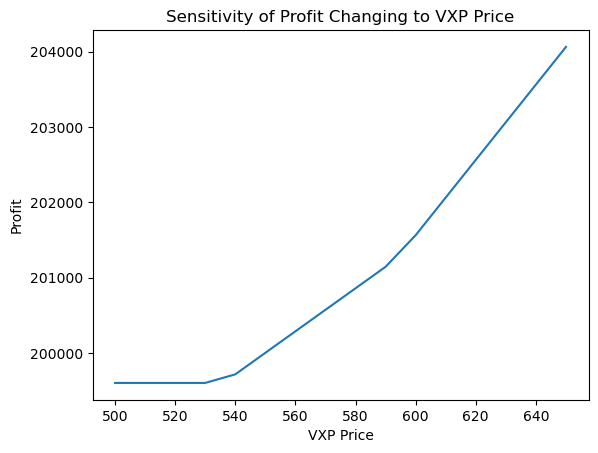

In [7]:
plt.plot(df['PriceVXP'], df['Profit'])
plt.title('Sensitivity of Profit Changing to VXP Price')
plt.xlabel('VXP Price')
plt.ylabel('Profit')
plt.show()

In [8]:
###############################################################################################################################

## 3) Textbook Problem 3.46
**Question: If you add a constraint to an optimization model, and the previously optimal solution satisfies the new constraint, will this solution still be optimal with the new constraint added? Why or why not?**

Answer: Yes, since the previously optimal solution satisfies the new constraint, meaning the optimal solution falls within the additional constraint's requirements, then the solution remains optimal. The optimal solution would no longer remain if a new constraint was introduced that the optimal solution no longer fit within such that it required changes to the optimal solution. If the new constraint was non-binding then it would not affect the optimal solution.

In [9]:
###############################################################################################################################

## 4) Textbook Problem 3.50
**Question: In a typical product mix model, where a company must decide how much of each product to produce to maximize profit, there are sometimes customer demands for the products. We used upper-bound constraints for these: Don’t produce more than you can sell. Would it be realistic to have lower-bound constraints instead: Produce at least as much as is demanded?**

Answer: There are situations when a lower-bound constraint would be realistic and one of these is within the work that I do as an Army Logistics officer. Delivering a minimum amount of fuel and ammunition (the most important supplies) to a unit in combat has certain minimum quantities to maintain momentum and fire superiority called 'combat loads'. These loads must carry a minimum amount, which is usually the demand signal of 100% of the fuel tank capacity or ammunition holding space on the vehicle platform. In these situations,  a lower-bound constraint to produce (deliver) as much as demanded can be the balance between mission success or failure. Further, delivering more than the demand oftentimes provides the unit's logistics assets to refill their own stocks for future demand.


**Question: Would it be realistic to have both (where the upper bounds are greater than the lower bounds)?**

Answer: Yes, as mentioned directly above there is absolutely a need in certain situations to have the lower-bound match demand and again, there is relevance to the work I do as a logistician in having both upper and lower bounds greater than demand. In my experience, I would use the upper bound to tbe the maximum capacity of the combat unit being completely resupplied plus the storage capacities of the unit's logistics assets. I would use these as the upper bound because any supply carried beyond that limit is surplus, that will likely be backhauled by the resupplying unit (waste). 


**Question: Would it be realistic to have equality constraints: Produce exactly what is demanded?**

Answer: There are situations where equality constraints may be realistic, such as scenarios involving maximum capacities or limited quantities of supplies such that each specific item had a purpose in the output. Budgeting may be one example where ensuring each dollar within the budget is spent per fiscal year to ensure the subsequent year's funding remains the same or greater. I have encountered this in my work in the Army where units work to spend every dollar at the end of each fiscal year to ensure the funding for the next year is at least what was spent the previous year. 

In [10]:
###############################################################################################################################

## 5) Modified LEGO Problem
Consider LEGO product mix problem discussed in Module 1. Modify this problem by adding a third product: Coffee Tables. A single Coffee Table generates $15 in profit, uses 2 Big Blocks, and uses 1 Small Block. Use the same data for Tables and Chairs as stated in the original problem.

Screenshot of Excel model for LEGO Problem

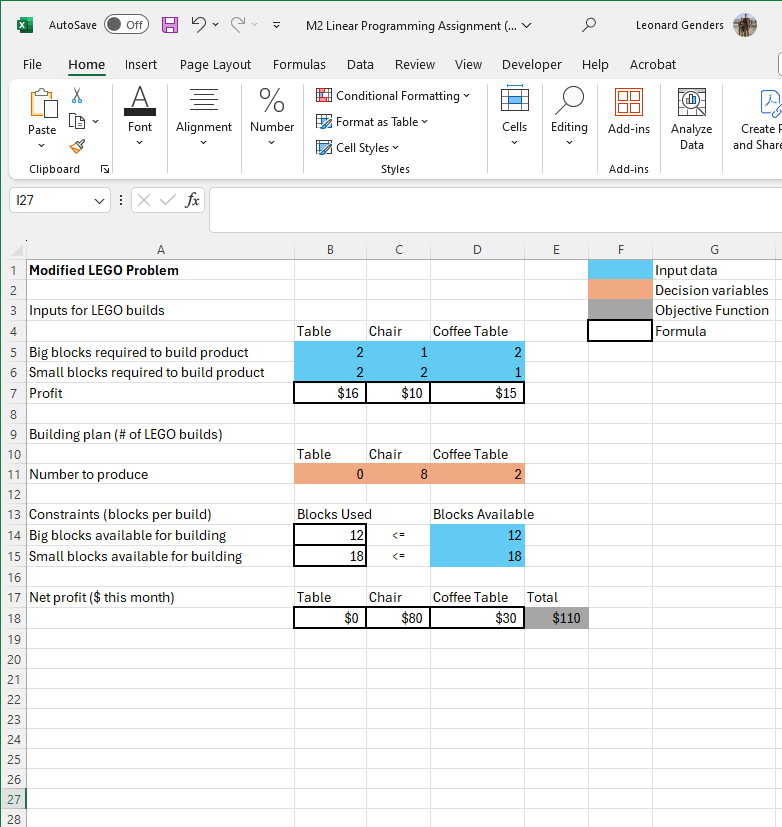

In [11]:
from IPython import display
display.Image("LEGO_model.png")

Screenshot of Excel Solver for LEGO Problem

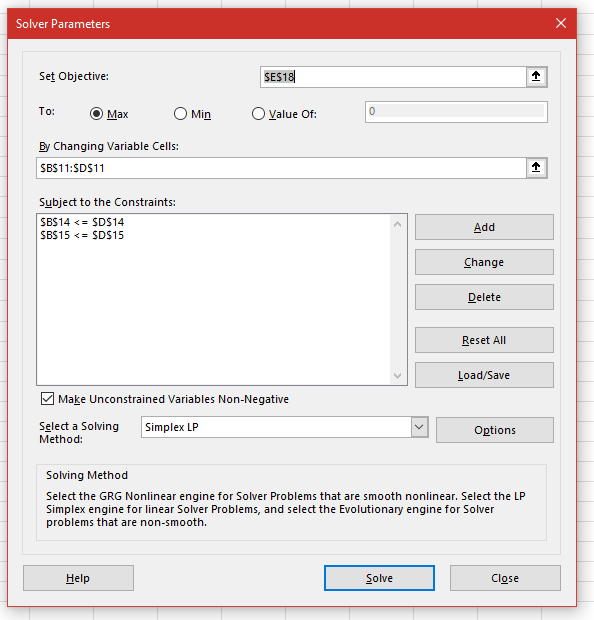

In [12]:
from IPython import display
display.Image("LEGO_solver.png")

## Model Formulation - Modified LEGO Problem

**Sets** \
$L$: set of LEGO builds \{1=Table, 2=Chair, 3=CoffeeTable\} \
$B$: set of avaialble blocks\{1=Big, 2=Small\} \

**Parameters** \
$v$: vector of unit profits ($v_1 = 16$, $v_2 = 10$, $v_3 = 15$) \
$r$: vector of available block resources ($r_1 = 12$, $r_2 = 18$), where $r_1$ represents big blocks and $r_2$ represents small blocks \
$A$: matrix of block resource requirements, where $a_{i,j}$ represents the amount of blocks $i$ to produce the LEGO build $j$. For example, $a_{1,2} = $1 because it takes $1$ Big Block ($i=1$) to produce one Chair ($j=2$).

**Decision Variable** \
$x$: vector amount of each type of LEGO build to produce, where $x_1$ is Table, $x_2$ is Chair, and $x_3$ is CoffeeTable.

**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\underset{x}{\max} & 16x_1 + 10x_2 + 15x_3 &\\
\textrm{s.t.} & 2x_1 + x_2 + 2x_3 & \leq & 12 & \\
& 2x_1 + 2x_2 + x_3 & \leq & 18 & \\
& x_1, x_2, x_3 & \geq & 0 \\
\end{matrix}
\end{equation*}

## Python/Gurobi Model - Modified LEGO Problem
I am using the lists with 'Brute Force' Approach from Insights Video 2.3

In [13]:
from gurobipy import *
m = Model('ModLEGO')

# Sets
# Not defining sets - using 'brute force' method

# Parameters
# Not defining parameters - using 'brute force' method

# Decision Variables
## Number Tables to produce
x1 = m.addVar(name='Table', lb=0)
## Number Chairs to produce
x2 = m.addVar(name='Chair', lb=0)
## Number Coffee Tables to produce
x3 = m.addVar(name='CoffeeTable', lb=0)

# Objective Function
## Maximize total profit
m.setObjective(16*x1 + 10*x2 + 15*x3, GRB.MAXIMIZE)
m.update()

# Constraints
## Big Block constraint
m.addConstr(2*x1 + 1*x2 + 2*x3 <= 12)
## Small Block constraint
m.addConstr(2*x1 + 2*x2 + x3 <= 18)
m.update()

# Solve and Print Solution
m.optimize()
print("\n\n")
print("I should produce %s units of Tables." % round(x1.x))
print("I should produce %s units of Chairs." % round(x2.x))
print("I should produce %s units of Coffee Tables." % round(x3.x))
print("The total profit is %s." % round(m.objval, 2))

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x5d654b3c
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 2e+01]
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1000000e+31   5.000000e+30   4.100000e+01      0s
       2    1.1000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.100000000e+02



I should produce 0 units of Tables.
I should produce 8 units of Chairs.
I should produce 2 units of Coffee Tables.
The total profit is 110.0.


**Question: Explain why the optimal profit of this modified version of the problem (with coffee tables) is grater than that of the original version of the problem (without coffee tables).**

Answer: The profit from the original version of the LEGO problem (without Coffee Tables) had an optimal solution of making 6 Chairs and 3 Tables, using all 12 big blocks and 18 small blocks for a profit of $108$ dollars. In the modified version of the LEGO problem, an additional decision variable is included - how many Coffee Tables to create where the block requirements are 2 big blocks and 1 small block. The profit of each Coffee Table is $15$ dollars, which is second in order of most profitable builds with first as the Table and last as the Chair. The reason the optimal solution is greater by $2$ dollars (110 - 108) in the modified version of the LEGO problem is that the decision variable coefficients change such that:

**Original Version Decision Variable Coefficients and Profit**:


x_1 = 3, or 3 tables made \
x_2 = 6, or 6 chairs made 


**Total Profit**: (16 * 3) + (10 * 6) = $108$ dollars


**Modified Version Decision Variable Coefficients and Profit**:


x_1 = 0, or 0 tables made \
x_2 = 8, or 8 chairs made \
x_3 = 2, or 2 coffee tables made

**Total Profit**: (16 * 0) + (10 * 8) + (15 * 2) = $110$ dollars 

Also, the coffee table requires one less small block to create only $1$ less in profit, so the modified LEGO version was able to create more chairs and two coffee tables for $2$ dollars more profit in the modified LEGO problem.